In [ ]:
import numpy as np 
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
dh = pd.read_csv('/media/hotel_bookings.csv')

In [ ]:
dh.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
dh.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

**ADR= AVERAGE DAILY RATE "tarif harian **


In [ ]:
dh.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             455
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              4639
company                           20108


In [ ]:
dh = dh.dropna(axis = 0)
dh.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Text(0.5, 1.0, 'Arriving year, Leadtime and Cancelations')

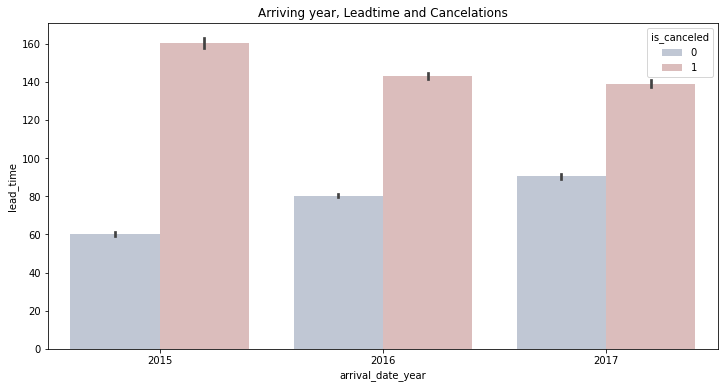

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= dh, palette='vlag')
plt.title('Arriving year, Leadtime and Cancelations')

In [ ]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

data1=go.Pie(labels=dh.arrival_date_year, values = dh.lead_time)
fig = go.Figure(data=data1)
iplot(fig)

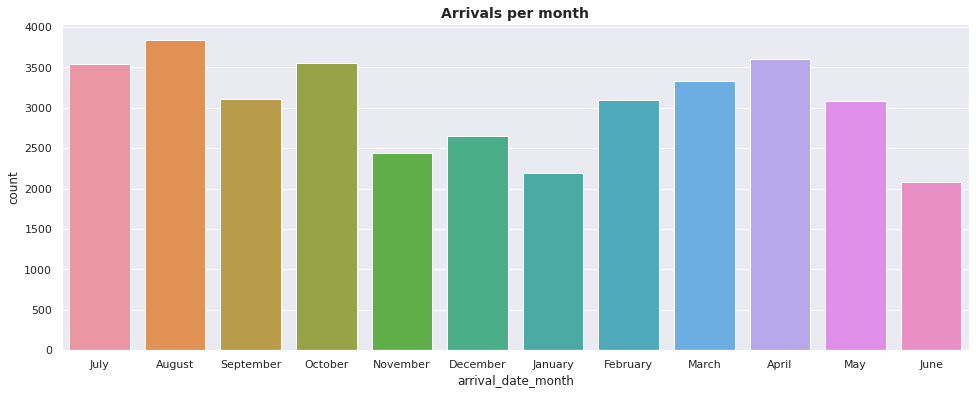

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data = dh, x = 'arrival_date_month')
plt.title('Arrivals per month',fontweight="bold", size=14)
plt.subplots_adjust(right=1.7)

plt.show()

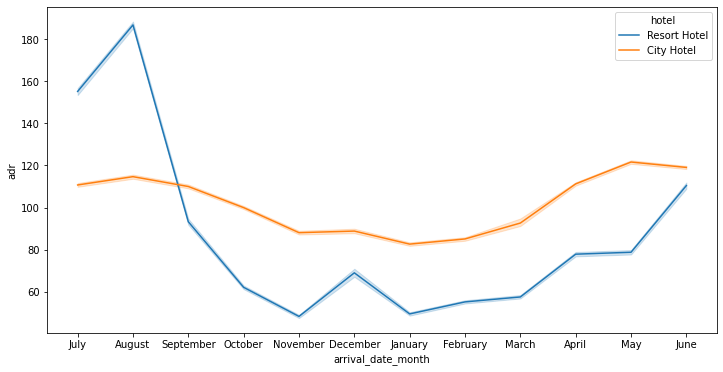

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= dh)
plt.show()

In [ ]:
import numpy as np
from scipy.stats import norm

In [ ]:
std = np.std(dh['total_of_special_requests'], ddof=1)
mean = np.mean(dh['total_of_special_requests'])
median = np.median(dh['total_of_special_requests'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


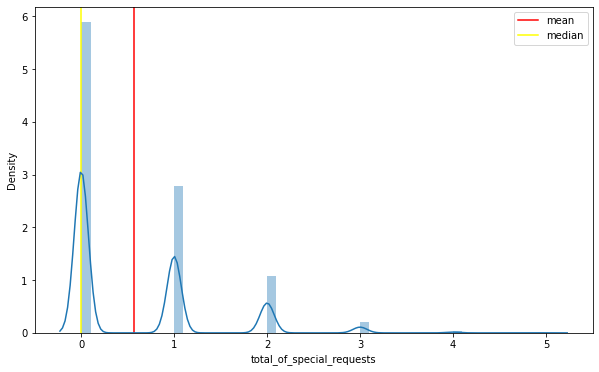

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.axvline(dh['total_of_special_requests'].describe()['mean'], color = 'red', label = 'mean')
plt.axvline(dh['total_of_special_requests'].describe()['50%'], color = 'yellow', label = 'median')
sns.distplot(dh['total_of_special_requests'])
plt.legend()

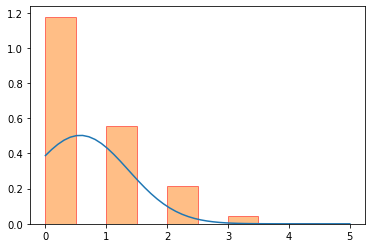

In [ ]:
domain = np.linspace(np.min(dh['total_of_special_requests']), np.max(dh['total_of_special_requests']))
plt.plot(domain, norm.pdf(domain,mean,std))
plt.hist(dh['total_of_special_requests'], edgecolor='red', alpha=0.5,density=True)
plt.show()

In [ ]:
std = np.std(dh['lead_time'], ddof=1)
mean = np.mean(dh['lead_time'])
median = np.median(dh['lead_time'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


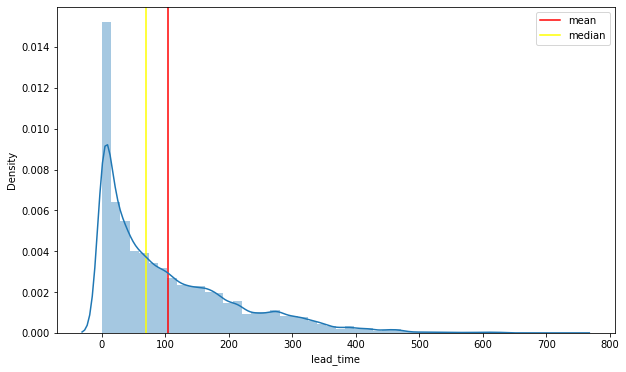

In [ ]:
plt.figure(figsize = (10, 6))
plt.axvline(dh['lead_time'].describe()['mean'], color = 'red', label = 'mean')
plt.axvline(dh['lead_time'].describe()['50%'], color = 'yellow', label = 'median')
sns.distplot(dh['lead_time'])
plt.legend()

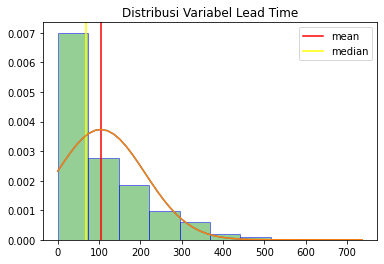

In [ ]:
domain = np.linspace(np.min(dh['lead_time']), np.max(dh['lead_time']))
plt.plot(domain, norm.pdf(domain,mean,std))

plt.axvline(mean, color = 'red', label = 'mean')
plt.axvline(median, color = 'yellow', label = 'median')
plt.plot(domain, norm.pdf(domain,mean,std))
plt.hist(dh['lead_time'], edgecolor='blue', alpha=0.5
,density=True)
plt.title('Distribusi Variabel Lead Time')
plt.legend()
plt.show()


In [ ]:
dh['lead_time'].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

In [ ]:
std = np.std(dh['is_repeated_guest'], ddof=1)
mean = np.mean(dh['is_repeated_guest'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


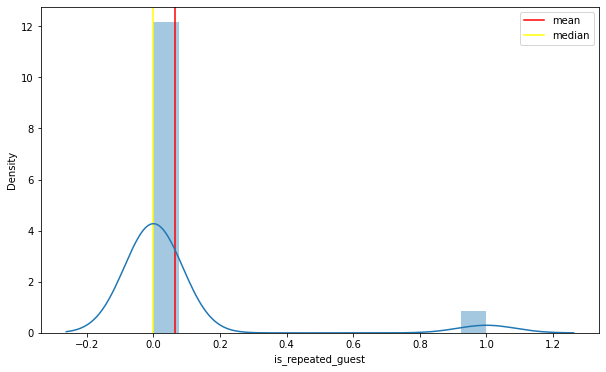

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 6))
plt.axvline(dh['is_repeated_guest'].describe()['mean'], color = 'red', label = 'mean')
plt.axvline(dh['is_repeated_guest'].describe()['50%'], color = 'yellow', label = 'median')
sns.distplot(dh['is_repeated_guest'])
plt.legend()

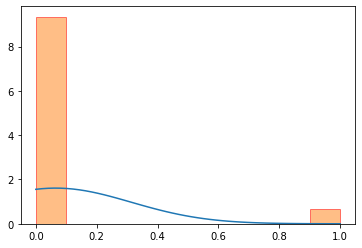

In [ ]:
import numpy as np
from scipy.stats import norm

domain = np.linspace(np.min(dh['is_repeated_guest']), np.max(dh['is_repeated_guest']))
plt.plot(domain, norm.pdf(domain,mean,std))
plt.hist(dh['is_repeated_guest'], edgecolor='red', alpha=0.5,density=True)
plt.show()

In [ ]:
std = np.std(dh['booking_changes'], ddof=1)
mean = np.mean(dh['booking_changes'])
median = np.median(dh['booking_changes'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


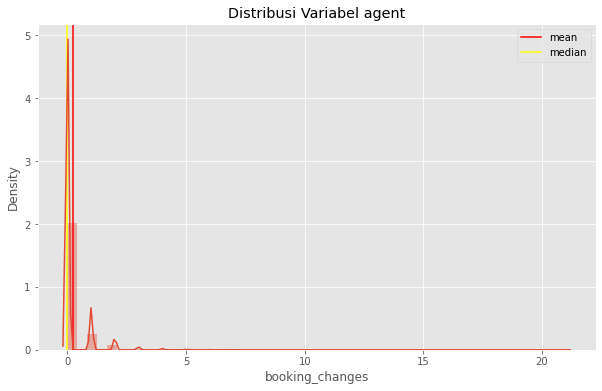

In [ ]:
plt.figure(figsize = (10, 6))
mpl.style.use(['ggplot'])

plt.axvline(dh['booking_changes'].describe()['mean'], color = 'red', label = 'mean')
plt.axvline(dh['booking_changes'].describe()['50%'], color = 'yellow', label = 'median')
sns.distplot(dh['booking_changes'])

plt.title('Distribusi Variabel agent')
plt.legend()

In [ ]:
plt.figure(figsize = (10, 6))
domain = np.linspace(np.min(dh['total_of_special_requests']), np.max(dh['total_of_special_requests']))
plt.axvline(mean, color = 'red', label = 'mean')
plt.axvline(median, color = 'yellow', label = 'median')
plt.plot(domain, norm.pdf(domain,mean,std))
plt.hist(dh['total_of_special_request'], edgecolor='red', alpha=0.5,density=True)
plt.show()

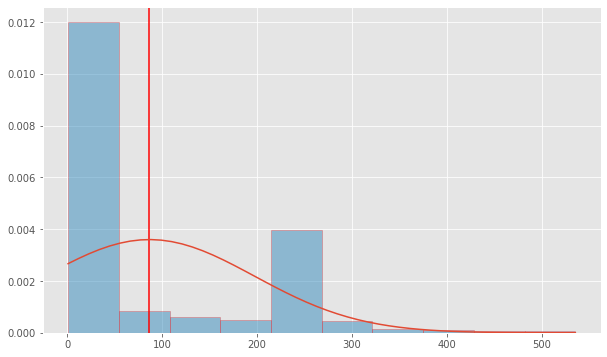

In [ ]:
plt.figure(figsize = (10, 6))
domain = np.linspace(np.min(dh['agent']), np.max(dh['agent']))
plt.axvline(mean, color = 'red', label = 'mean')
plt.axvline(median, color = 'yellow', label = 'median')
plt.plot(domain, norm.pdf(domain,mean,std))
plt.hist(dh['agent'], edgecolor='red', alpha=0.5,density=True)
plt.show()